### Import libraries

In [1]:
# usual libraries
import requests
import os
import time
import numpy as np 
import pandas as pd
from collections import Counter
# visualize libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#ast
import ast
#wordcloud
from wordcloud import WordCloud
# add view settings
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### 1. Parse vacancies from hh.ru and save in file

In [3]:
# Number of region: 113-all Russia, 1- Moscow, 2-St.Petersburg, 3-Ekaterinburg, 4-Novosibirsk, 88-Kazan
region_number = 113
# Vacancie Name
job_title = ['Data Scientist']
# Maximum vacancies range - 30 days!
time_period = 30

In [4]:
class HHVacanciesParseWithAPI:
    def __init__(self, area_number, period=None):
        self.area_number = area_number
        self._url = 'https://api.hh.ru/vacancies'
        if period is None:
            self.period = 30
        else:
            self.period = period

    def save_vacancies_data_into_dataframe(self, vacancy_name, vacancies_list):
        vacancy_additional_details = requests.get(vacancies_list[0]['items'][0]['url']).json().keys()
        df = pd.DataFrame(columns=list(vacancy_additional_details))
        ind = 0
        for i in range(len(vacancies_list)):
            for j in range(len(vacancies_list[i]['items'])):
                additional_vacancies_data = requests.get(vacancies_list[i]['items'][j]['url']).json()
                time.sleep(0.5)
                df.loc[ind] = additional_vacancies_data
                print(f'Add info for {ind+1} vacancies into dataframe!')
                ind += 1
        csv_name = f'{vacancy_name}_{self.area_number}.csv'
        df.to_csv(csv_name, index=False)
        print(f'Save vacancies in file: {csv_name}')

    def collect_vacancies_data_into_list(self, job_name):
        try:
            vacancies_data_list = []
            common_get_request_params = {'text': job_name, 'area': self.area_number, 'period': self.period}
            vacancies_data = requests.get(self._url, params=common_get_request_params).json()
            vacancies_data_number_of_pages = vacancies_data['pages']
            for one_page in range(int(vacancies_data_number_of_pages)):
                get_request_params = {'text': job_name, 'area': self.area_number, 'period': self.period, 'page': one_page}
                vacancies_data_from_one_page = requests.get(self._url, params=get_request_params).json()
                vacancies_data_list.append(vacancies_data_from_one_page)
                print(f'Count of parsed vacancies pages: {one_page + 1}')
                time.sleep(0.5)
            self.save_vacancies_data_into_dataframe(job_name, vacancies_data_list)
        except Exception as exc:
            with open(os.path.join(os.getcwd(), 'log.txt'), 'a') as log_file:
                log_file.write(f'Happen exception {exc} with arguments {exc.args} \n')

In [5]:
vacancies_parser_obj = HHVacanciesParseWithAPI(region_number, time_period)
for one_job_name in job_title:
    vacancies_parser_obj.collect_vacancies_data_into_list(one_job_name)
    print(f'Processed {one_job_name} vacancy!')

Count of parsed vacancies pages: 1
Count of parsed vacancies pages: 2
Count of parsed vacancies pages: 3
Count of parsed vacancies pages: 4
Count of parsed vacancies pages: 5
Count of parsed vacancies pages: 6
Count of parsed vacancies pages: 7
Count of parsed vacancies pages: 8
Count of parsed vacancies pages: 9
Count of parsed vacancies pages: 10
Count of parsed vacancies pages: 11
Count of parsed vacancies pages: 12
Count of parsed vacancies pages: 13
Count of parsed vacancies pages: 14
Count of parsed vacancies pages: 15
Count of parsed vacancies pages: 16
Count of parsed vacancies pages: 17
Count of parsed vacancies pages: 18
Count of parsed vacancies pages: 19
Count of parsed vacancies pages: 20
Count of parsed vacancies pages: 21
Count of parsed vacancies pages: 22
Count of parsed vacancies pages: 23
Count of parsed vacancies pages: 24
Count of parsed vacancies pages: 25
Add info for 1 vacancies into dataframe!
Add info for 2 vacancies into dataframe!
Add info for 3 vacancies in

Add info for 174 vacancies into dataframe!
Add info for 175 vacancies into dataframe!
Add info for 176 vacancies into dataframe!
Add info for 177 vacancies into dataframe!
Add info for 178 vacancies into dataframe!
Add info for 179 vacancies into dataframe!
Add info for 180 vacancies into dataframe!
Add info for 181 vacancies into dataframe!
Add info for 182 vacancies into dataframe!
Add info for 183 vacancies into dataframe!
Add info for 184 vacancies into dataframe!
Add info for 185 vacancies into dataframe!
Add info for 186 vacancies into dataframe!
Add info for 187 vacancies into dataframe!
Add info for 188 vacancies into dataframe!
Add info for 189 vacancies into dataframe!
Add info for 190 vacancies into dataframe!
Add info for 191 vacancies into dataframe!
Add info for 192 vacancies into dataframe!
Add info for 193 vacancies into dataframe!
Add info for 194 vacancies into dataframe!
Add info for 195 vacancies into dataframe!
Add info for 196 vacancies into dataframe!
Add info fo

Add info for 365 vacancies into dataframe!
Add info for 366 vacancies into dataframe!
Add info for 367 vacancies into dataframe!
Add info for 368 vacancies into dataframe!
Add info for 369 vacancies into dataframe!
Add info for 370 vacancies into dataframe!
Add info for 371 vacancies into dataframe!
Add info for 372 vacancies into dataframe!
Add info for 373 vacancies into dataframe!
Add info for 374 vacancies into dataframe!
Add info for 375 vacancies into dataframe!
Add info for 376 vacancies into dataframe!
Add info for 377 vacancies into dataframe!
Add info for 378 vacancies into dataframe!
Add info for 379 vacancies into dataframe!
Add info for 380 vacancies into dataframe!
Add info for 381 vacancies into dataframe!
Add info for 382 vacancies into dataframe!
Add info for 383 vacancies into dataframe!
Add info for 384 vacancies into dataframe!
Add info for 385 vacancies into dataframe!
Add info for 386 vacancies into dataframe!
Add info for 387 vacancies into dataframe!
Add info fo

### 2. Read, prepare and clear data

In [6]:
ds_vacancies_data = pd.read_csv(f'Data Scientist_113.csv')
ds_vacancies_data.head()

,id,premium,billing_type,relations,name,insider_interview,response_letter_required,area,salary,type,address,allow_messages,site,experience,schedule,employment,department,contacts,description,branded_description,vacancy_constructor_template,key_skills,accept_handicapped,accept_kids,archived,response_url,specializations,code,hidden,quick_responses_allowed,driver_license_types,accept_incomplete_resumes,employer,published_at,created_at,negotiations_url,suitable_resumes_url,apply_alternate_url,has_test,test,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary
0,44350010,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Data Scientist,NaN,False,"{'id': '3', 'name': 'Екатеринбург', 'url': 'ht...","{'from': 100000, 'to': 250000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Екатеринбург', 'street': 'улица Сакк...",True,"{'id': 'hh', 'name': 'hh.ru'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,NaN,"<p>Ищем специалиста по Data Science, чтобы стр...","\n<style>\n.tmpl_hh_wrapper p,\n.tmpl_hh_wrapp...",NaN,"[{'name': 'Data Mining'}, {'name': 'Python'}, ...",False,False,False,NaN,"[{'id': '5.27', 'name': 'Аналитик', 'profarea_...",NaN,False,False,[],False,"{'id': '2324020', 'name': 'Точка', 'url': 'htt...",2021-05-22T09:43:26+0300,2021-05-22T09:43:26+0300,NaN,NaN,https://hh.ru/applicant/vacancy_response?vacan...,False,NaN,https://hh.ru/vacancy/44350010,[],[],[],False
1,44240210,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Data Scientist,NaN,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 150000, 'to': 250000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",NaN,True,"{'id': 'hh', 'name': 'hh.ru'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'flexible', 'name': 'Гибкий график'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,NaN,"<p>Мы, компания <strong>RedMercury</strong>, о...",NaN,NaN,"[{'name': 'Kotlin'}, {'name': 'Machine Learnin...",False,False,False,NaN,"[{'id': '14.91', 'name': 'Информатика, Информа...",NaN,False,False,[],False,"{'id': '2160618', 'name': 'Нейронов Антон', 'u...",2021-05-21T21:04:26+0300,2021-05-21T21:04:26+0300,NaN,NaN,https://hh.ru/applicant/vacancy_response?vacan...,False,NaN,https://hh.ru/vacancy/44240210,[],[],[],False
2,44526667,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Junior Data Scientist,NaN,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",NaN,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'улица Намёткина'...",True,"{'id': 'hh', 'name': 'hh.ru'}","{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,NaN,<p><strong>SaveTime – </strong>это сервис дост...,NaN,NaN,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':...",False,False,False,NaN,"[{'id': '1.25', 'name': 'Аналитик', 'profarea_...",NaN,False,False,[],False,"{'id': '2964582', 'name': 'SaveTime', 'url': '...",2021-05-24T15:04:48+0300,2021-05-24T15:04:48+0300,NaN,NaN,https://hh.ru/applicant/vacancy_response?vacan...,False,NaN,https://hh.ru/vacancy/44526667,[],[],[],False
3,40374266,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Senior Data Scientist (Recommender Systems),NaN,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 250000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Лесная улица', '...",True,"{'id': 'hh', 'name': 'hh.ru'}","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,NaN,<p><strong>FunCorp</strong> — международная ко...,NaN,NaN,"[{'name': 'Python'}, {'name': 'Clickhouse'}, {...",False,False,False,NaN,"[{'id': '1.221', 'name': 'Программирование, Ра...",NaN,False,False,[],False,"{'id': '1212374', 'name': 'FunCorp', '

#### Select important columns

In [7]:
cut_ds_data = ds_vacancies_data[['employer', 'area', 'name', 'salary', 'experience', 'schedule', 'description', 'key_skills', 'published_at']].copy()
cut_ds_data.head()

,employer,area,name,salary,experience,schedule,description,key_skills,published_at
0,"{'id': '2324020', 'name': 'Точка', 'url': 'htt...","{'id': '3', 'name': 'Екатеринбург', 'url': 'ht...",Data Scientist,"{'from': 100000, 'to': 250000, 'currency': 'RU...","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'fullDay', 'name': 'Полный день'}","<p>Ищем специалиста по Data Science, чтобы стр...","[{'name': 'Data Mining'}, {'name': 'Python'}, ...",2021-05-22T09:43:26+0300
1,"{'id': '2160618', 'name': 'Нейронов Антон', 'u...","{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",Data Scientist,"{'from': 150000, 'to': 250000, 'currency': 'RU...","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'flexible', 'name': 'Гибкий график'}","<p>Мы, компания <strong>RedMercury</strong>, о...","[{'name': 'Kotlin'}, {'name': 'Machine Learnin...",2021-05-21T21:04:26+0300
2,"{'id': '2964582', 'name': 'SaveTime', 'url': '...","{'id': '1', 'name': 'Москва', 'url': 'https://...",Junior Data Scientist,NaN,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'fullDay', 'name': 'Полный день'}",<p><strong>SaveTime – </strong>это сервис дост...,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':...",2021-05-24T15:04:48+0300
3,"{'id': '1212374', 'name': 'FunCorp', 'url': 'h...","{'id': '1', 'name': 'Москва', 'url': 'https://...",Senior Data Scientist (Recommender Systems),"{'from': 250000, 'to': None, 'currency': 'RUR'...","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'fullDay', 'name': 'Полный день'}",<p><strong>FunCorp</strong> — международная ко...,"[{'name': 'Python'}, {'name': 'Clickhouse'}, {...",2021-05-24T11:18:15+0300
4,"{'id': '1980636', 'name': 'Дип Системс', 'url'...","{'id': '1', 'name': 'Москва', 'url': 'https://...",Data Scientist (компьютерное зрение),"{'from': 70000, 'to': 400000, 'currency': 'RUR...","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'remote', 'name': 'Удаленная работа'}",<p><strong>О нас</strong></p> <p>Supervisely -...,"[{'name': 'Python'}, {'name': 'Git'}, {'name':...",2021-05-23T13:55:29+0300


#### Modify selected data

In [8]:
cut_ds_data['published_at'] = pd.to_datetime(cut_ds_data['published_at'], dayfirst=True)
cut_ds_data['employer'] = cut_ds_data['employer'].apply(lambda x: ast.literal_eval(x)['name'])
cut_ds_data['area'] = cut_ds_data['area'].apply(lambda x: ast.literal_eval(x)['name'])
cut_ds_data['experience'] = cut_ds_data['experience'].apply(lambda x: ast.literal_eval(x)['name'])
cut_ds_data['schedule'] = cut_ds_data['schedule'].apply(lambda x: ast.literal_eval(x)['name'])
cut_ds_data['key_skills'] = cut_ds_data['key_skills'].apply(lambda x: [v for v_dict in ast.literal_eval(x) for _, v in v_dict.items()])
cut_ds_data['description'] = cut_ds_data['description'].apply(lambda x: x if x is not None and len(x)>50 else None)
cut_ds_data = cut_ds_data.replace(to_replace='None', value=np.nan).dropna(subset=['description'])
cut_ds_data.reset_index(drop=True, inplace=True)
cut_ds_data.head()
cut_ds_data.info()

,employer,area,name,salary,experience,schedule,description,key_skills,published_at
0,Точка,Екатеринбург,Data Scientist,"{'from': 100000, 'to': 250000, 'currency': 'RU...",От 1 года до 3 лет,Полный день,"<p>Ищем специалиста по Data Science, чтобы стр...","[Data Mining, Python, Математическая статистик...",2021-05-22 09:43:26+03:00
1,Нейронов Антон,Санкт-Петербург,Data Scientist,"{'from': 150000, 'to': 250000, 'currency': 'RU...",От 1 года до 3 лет,Гибкий график,"<p>Мы, компания <strong>RedMercury</strong>, о...","[Kotlin, Machine Learning, Python, TensorFlow,...",2021-05-21 21:04:26+03:00
2,SaveTime,Москва,Junior Data Scientist,NaN,Нет опыта,Полный день,<p><strong>SaveTime – </strong>это сервис дост...,"[Python, SQL, numpy, pandas, machine learning]",2021-05-24 15:04:48+03:00
3,FunCorp,Москва,Senior Data Scientist (Recommender Systems),"{'from': 250000, 'to': None, 'currency': 'RUR'...",От 3 до 6 лет,Полный день,<p><strong>FunCorp</strong> — международная ко...,"[Python, Clickhouse, Data Science, ML]",2021-05-24 11:18:15+03:00
4,Дип Системс,Москва,Data Scientist (компьютерное зрение),"{'from': 70000, 'to': 400000, 'currency': 'RUR...",От 1 года до 3 лет,Удаленная работа,<p><strong>О нас</strong></p> <p>Supervisely -...,"[Python, Git, Deep Learning, Computer Vision, ...",2021-05-23 13:55:29+03:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype                                
---  ------        --------------  -----                                
 0   employer      487 non-null    object                               
 1   area          487 non-null    object                               
 2   name          487 non-null    object                               
 3   salary        79 non-null     object                               
 4   experience    487 non-null    object                               
 5   schedule      487 non-null    object                               
 6   description   487 non-null    object                               
 7   key_skills    487 non-null    object                               
 8   published_at  487 non-null    datetime64[ns, pytz.FixedOffset(180)]
dtypes: datetime64[ns, pytz.FixedOffset(180)](1), object(8)
memory usage: 34.4+ KB


### 3. Build a wordcloud from key skills

#### Count a key skills word frequency for build a wordcloud

In [9]:
bag_words = []
for vacancy_key_skills in cut_ds_data['key_skills'].values:
    for one_word in vacancy_key_skills:
        bag_words.append(one_word)

In [10]:
counter_words_dict = Counter(bag_words)
counter_words_dict.most_common(50)

[('Python', 280),
 ('SQL', 180),
 ('Data Mining', 91),
 ('Английский язык', 63),
 ('Git', 54),
 ('Математическая статистика', 44),
 ('Linux', 41),
 ('Анализ данных', 40),
 ('Data Analysis', 31),
 ('Spark', 31),
 ('MS SQL', 28),
 ('C++', 27),
 ('Docker', 26),
 ('Hadoop', 26),
 ('Big Data', 25),
 ('Аналитические исследования', 24),
 ('NLP', 23),
 ('Machine Learning', 21),
 ('ML', 21),
 ('machine learning', 19),
 ('PostgreSQL', 19),
 ('Статистический анализ', 18),
 ('Математический анализ', 16),
 ('Java', 16),
 ('Pandas', 15),
 ('MS PowerPoint', 14),
 ('TensorFlow', 12),
 ('Математическое моделирование', 12),
 ('Machine learning', 12),
 ('Работа в команде', 12),
 ('SCALA', 12),
 ('data science', 12),
 ('pytorch', 12),
 ('Аналитическое мышление', 11),
 ('pandas', 11),
 ('MATLAB', 11),
 ('sklearn', 11),
 ('Прогнозирование', 11),
 ('Data Science', 10),
 ('Базы данных', 10),
 ('Agile Project Management', 10),
 ('PyTorch', 9),
 ('Работа с базами данных', 9),
 ('MS SQL Server', 9),
 ('MySQL', 9

In [11]:
mc = sorted(counter_words_dict.items(), key=lambda k_v: k_v[1], reverse=True)[:50]

In [12]:
mc_dict = {one_row[0] : one_row[1] for one_row in mc}
mc_dict

{'Python': 280,
 'SQL': 180,
 'Data Mining': 91,
 'Английский язык': 63,
 'Git': 54,
 'Математическая статистика': 44,
 'Linux': 41,
 'Анализ данных': 40,
 'Data Analysis': 31,
 'Spark': 31,
 'MS SQL': 28,
 'C++': 27,
 'Docker': 26,
 'Hadoop': 26,
 'Big Data': 25,
 'Аналитические исследования': 24,
 'NLP': 23,
 'Machine Learning': 21,
 'ML': 21,
 'machine learning': 19,
 'PostgreSQL': 19,
 'Статистический анализ': 18,
 'Математический анализ': 16,
 'Java': 16,
 'Pandas': 15,
 'MS PowerPoint': 14,
 'TensorFlow': 12,
 'Математическое моделирование': 12,
 'Machine learning': 12,
 'Работа в команде': 12,
 'SCALA': 12,
 'data science': 12,
 'pytorch': 12,
 'Аналитическое мышление': 11,
 'pandas': 11,
 'MATLAB': 11,
 'sklearn': 11,
 'Прогнозирование': 11,
 'Data Science': 10,
 'Базы данных': 10,
 'Agile Project Management': 10,
 'PyTorch': 9,
 'Работа с базами данных': 9,
 'MS SQL Server': 9,
 'MySQL': 9,
 'ORACLE': 9,
 'ClickHouse': 9,
 'Project management': 8,
 'Atlassian Jira': 8,
 'Разра

#### Plot a WordCloud with most important Data Scientist key skills

<Figure size 2160x2160 with 0 Axes>

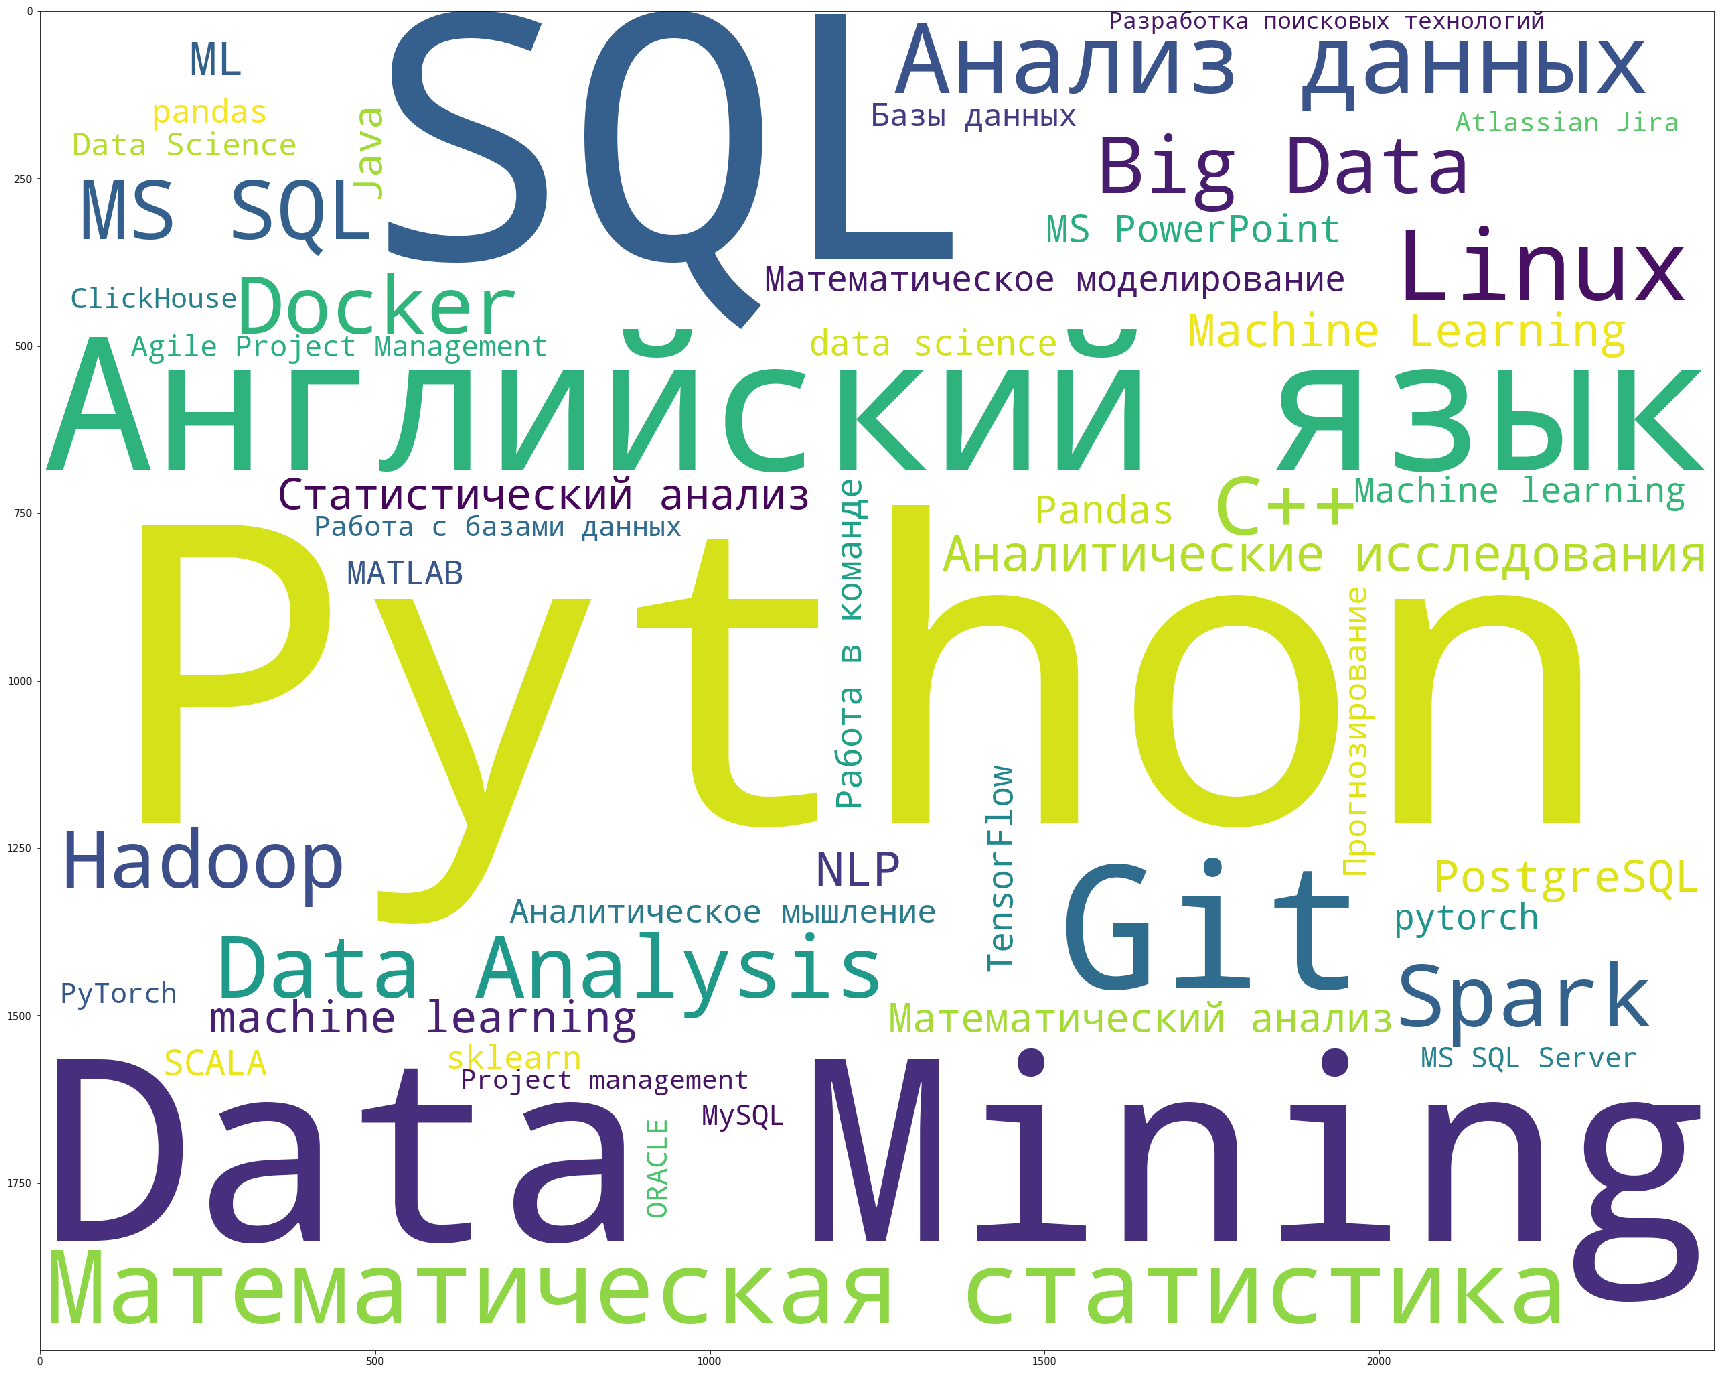

In [13]:
wordcloud = WordCloud(width = 2500, height = 2000, min_font_size = 8, background_color='white').generate_from_frequencies(mc_dict)
plt.figure(figsize = (30, 30)) 
plt.imshow(wordcloud)
plt.savefig('data_scientist_top_50_skills.pdf')

### 4. Compute median Data Scientist salary in rubles for most biggest cities.

#### Select the biggest cities for computing median salary by city

In [14]:
ds_ekb_data = cut_ds_data[cut_ds_data['area']=='Екатеринбург'].copy()
ds_kazan_data = cut_ds_data[(cut_ds_data['area']=='Казань') | (cut_ds_data['area']=='Иннополис')].copy()
ds_nn_data = cut_ds_data[cut_ds_data['area']=='Нижний Новгород'].copy()
ds_novosib_data = cut_ds_data[cut_ds_data['area']=='Новосибирск'].copy()
ds_spb_data = cut_ds_data[cut_ds_data['area']=='Санкт-Петербург'].copy()
ds_msk_data = cut_ds_data[cut_ds_data['area']=='Москва'].copy()
city_ds_data_dict = {'Ekaterinburg':ds_ekb_data, 'Kazan':ds_kazan_data, 'N.Novgorod':ds_nn_data, 'Novosibirsk':ds_novosib_data, 'St.Petersburg':ds_spb_data, 'Moscow':ds_msk_data}

#### Modilfy salary column 
##### - Transfer salary gross to netto.
##### - If we have a a salary plug in vacancy we calculate a mean salary (to+from/2).

In [15]:
def salary_rows_modify(one_vacancie):
    if one_vacancie['gross'] == True:
            if (one_vacancie['from'] is not None) and (one_vacancie['to'] is not None):
                return round(((one_vacancie['to']*0.87) + (one_vacancie['from']*0.87))/2, 1) 
            elif (one_vacancie['from'] is None) and (one_vacancie['to'] is not None):
                return one_vacancie['to']*0.5*0.87
            elif (one_vacancie['from'] is not None) and (one_vacancie['to'] is None):
                return one_vacancie['from']*0.87
            else:
                pass
    else:
        if (one_vacancie['from'] is not None) and (one_vacancie['to'] is not None):
            return round((one_vacancie['to'] + one_vacancie['from'])/2, 1) 
        elif (one_vacancie['from'] is None) and (one_vacancie['to'] is not None):
            return one_vacancie['to']*0.5
        elif (one_vacancie['from'] is not None) and (one_vacancie['to'] is None):
            return one_vacancie['from']
        else:
            pass

In [16]:
compute_salary_df = cut_ds_data.copy()
compute_salary_df = compute_salary_df.dropna(subset=['salary'])
compute_salary_df['salary'] = compute_salary_df['salary'].apply(lambda x: salary_rows_modify(ast.literal_eval(x)) if ast.literal_eval(x)['currency']=='RUR' else None)
compute_salary_df = compute_salary_df.replace(to_replace='None', value=np.nan).dropna(subset=['salary'])
compute_salary_df.reset_index(drop=True, inplace=True)
compute_salary_df.head()

,employer,area,name,salary,experience,schedule,description,key_skills,published_at
0,Точка,Екатеринбург,Data Scientist,175000.0,От 1 года до 3 лет,Полный день,"<p>Ищем специалиста по Data Science, чтобы стр...","[Data Mining, Python, Математическая статистик...",2021-05-22 09:43:26+03:00
1,Нейронов Антон,Санкт-Петербург,Data Scientist,200000.0,От 1 года до 3 лет,Гибкий график,"<p>Мы, компания <strong>RedMercury</strong>, о...","[Kotlin, Machine Learning, Python, TensorFlow,...",2021-05-21 21:04:26+03:00
2,FunCorp,Москва,Senior Data Scientist (Recommender Systems),250000.0,От 3 до 6 лет,Полный день,<p><strong>FunCorp</strong> — международная ко...,"[Python, Clickhouse, Data Science, ML]",2021-05-24 11:18:15+03:00
3,Дип Системс,Москва,Data Scientist (компьютерное зрение),204450.0,От 1 года до 3 лет,Удаленная работа,<p><strong>О нас</strong></p> <p>Supervisely -...,"[Python, Git, Deep Learning, Computer Vision, ...",2021-05-23 13:55:29+03:00
4,Дзенмани.ру,Санкт-Петербург,Data Scientist (исследователь) в области личны...,180000.0,От 1 года до 3 лет,Удаленная работа,<p>Привет! Я Антон — руководитель проекта Дзен...,"[ML, AI, Математическая статистика]",2021-05-23 17:35:44+03:00


#### Plot the median salary by city on the boxplot

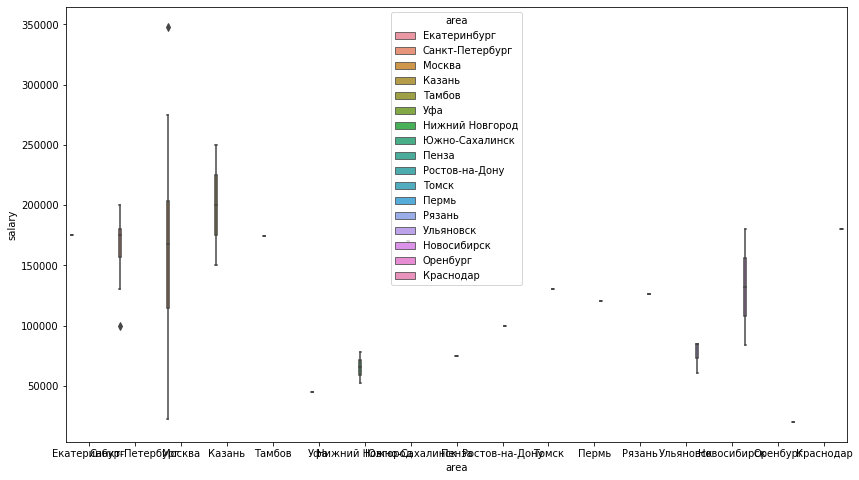

In [17]:
_, ax = plt.subplots(figsize=(14,8))
sns.boxplot(x='area', y='salary', data=compute_salary_df, hue='area', ax=ax)

#### Plot the median salary by experience on the boxplot

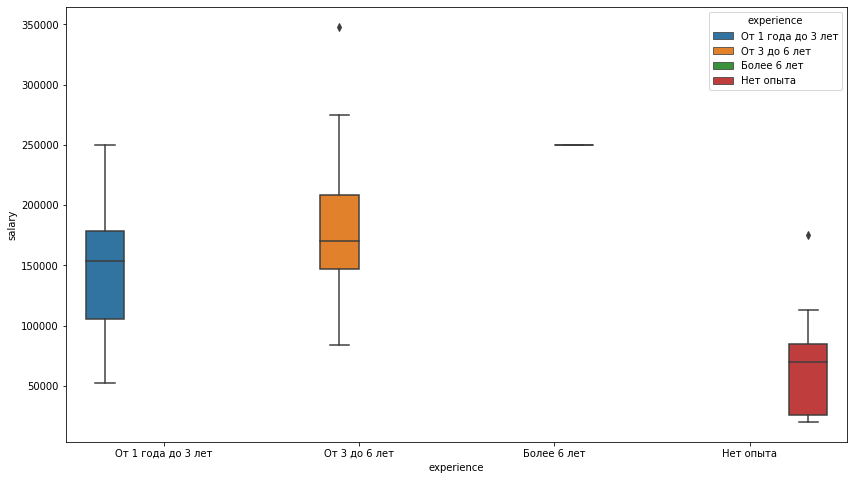

In [18]:
_, ax = plt.subplots(figsize=(14,8))
sns.boxplot(x='experience', y='salary', data=compute_salary_df, hue='experience', ax=ax)

#### Compute median salary for each biggest city

In [19]:
def compute_salary(rub_vacanices_list):
    vacancies_list = []
    for one_vacancie in rub_vacanices_list:
        if one_vacancie['gross'] == True:
            if (one_vacancie['from'] is not None) and (one_vacancie['to'] is not None):
                vacancies_list.append((one_vacancie['from']*0.87, one_vacancie['to']*0.87))
            elif (one_vacancie['from'] is None) and (one_vacancie['to'] is not None):
                vacancies_list.append(one_vacancie['to']*0.5*0.87)
            elif (one_vacancie['from'] is not None) and (one_vacancie['to'] is None):
                vacancies_list.append(one_vacancie['from']*0.87)
            else:
                pass
        else:
            if (one_vacancie['from'] is not None) and (one_vacancie['to'] is not None):
                vacancies_list.append((one_vacancie['from'], one_vacancie['to']))
            elif (one_vacancie['from'] is None) and (one_vacancie['to'] is not None):
                vacancies_list.append(one_vacancie['to']*0.5*0.87)
            elif (one_vacancie['from'] is not None) and (one_vacancie['to'] is None):
                vacancies_list.append(one_vacancie['from'])
            else:
                pass
    return list(map(np.median, vacancies_list))

In [20]:
def compute_median_salary_for_cities(cities_dict_df):
    salaries_city_dict = {}
    for city_label, city_df in cities_dict_df.items():
        salaries_data = city_df.salary.dropna()
        salary_list = compute_salary([ast.literal_eval(salaries_data.iloc[i]) for i in range(len(salaries_data)) if ast.literal_eval(salaries_data.iloc[i])['currency']=='RUR'])
        salaries_city_dict[city_label] = salary_list
        print(f'Median salary as Data Scientist in {city_label}: {round(np.mean(salary_list),2)} rub.')
    return salaries_city_dict

In [21]:
cities_salary_dict = compute_median_salary_for_cities(city_ds_data_dict)

Median salary as Data Scientist in Ekaterinburg: 175000.0 rub.
Median salary as Data Scientist in Kazan: 200000.0 rub.
Median salary as Data Scientist in N.Novgorod: 65250.0 rub.
Median salary as Data Scientist in Novosibirsk: 131750.0 rub.
Median salary as Data Scientist in St.Petersburg: 166523.08 rub.
Median salary as Data Scientist in Moscow: 163403.29 rub.
